In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
#REGRESSION WITH PCA

In [3]:
#Data Preprocessing

In [4]:
#To load the datasets
measurement = pd.read_csv('measurements_test.csv')
meta = pd.read_csv('hwg_metadata_test.csv')

In [5]:
#To merge the datasets on "subject_id"
test_data = pd.merge(measurement, meta, on='subject_id')

In [6]:
#To drop the "height_cm" and "subject_id" columns
test_data = test_data.drop(['height_cm', 'subject_id'], axis=1)

In [7]:
#To encode the gender to numeric values
encoder = LabelEncoder()
test_data['gender'] = encoder.fit_transform(test_data['gender'])

In [8]:
test_data

,ankle,arm-length,bicep,calf,chest,forearm,height,hip,leg-length,shoulder-breadth,shoulder-to-crotch,thigh,waist,wrist,gender,weight_kg
0,23.424223,47.128738,29.744926,37.697201,98.719429,25.687422,168.497925,101.086189,74.171860,37.112251,64.667030,52.378044,87.121025,16.179781,1,70.0
1,23.465136,48.513802,28.611294,33.724255,96.476715,24.859922,173.204254,98.461998,76.298210,35.401356,66.202171,48.386967,85.328270,16.165899,1,63.8
2,21.773336,45.142460,25.588623,32.983479,85.886726,21.981810,157.488388,89.685318,72.312012,31.207792,55.746342,46.059982,72.437881,14.523148,0,49.8
3,23.121952,47.717579,27.691643,36.397129,85.084686,23.563515,165.294891,100.694473,76.831047,31.613873,59.997318,52.054901,76.603951,15.654763,0,59.3
4,22.359692,46.879379,33.301228,35.578388,114.848450,25.253469,165.554520,106.579338,75.198700,33.318371,63.201122,57.078968,100.175446,15.805896,0,77.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,21.545984,45.408581,27.167900,34.238220,87.749992,23.869658,157.093094,91.882301,72.135750,32.659149,56.978413,48.515335,74.356583,14.940570,0,51.7
396,22.625656,49.227798,26.309393,32.858608,90.607895,24.658215,169.162079,90.448189,76.826469,34.129715,61.756729,45.681595,79.705154,16.533670,1,58.0
397,23.037413,50.321423,24.211857,32.132156,85.032234,21.701828,166.234940,91.258911,79.260719,31.132559,57.531410,48.716549,73.816757,14.949279,0,52.5
398,22.347176,46.713753,22.616318,34.585938,84.996567,20.987843,162.202942,88.928185,73.794296,30.869650,60.021980,44.175919,73.926147,13.739647,0,47.0


In [9]:
#To split the test dataset into features (x_test) and the target variable (y_test)
x_test = test_data.drop('weight_kg', axis=1)
y_test = test_data['weight_kg']

In [10]:
#To load the datasets
measurement_train = pd.read_csv('measurements_train.csv')
meta_train = pd.read_csv('hwg_metadata_train.csv')

In [11]:
#To merge the datasets on "subject_id"
train_data = pd.merge(measurement_train, meta_train, on='subject_id')

In [12]:
#To drop the "height_cm" and "subject_id" columns
train_data = train_data.drop(['height_cm', 'subject_id'], axis=1)

In [13]:
#To encode the gender to numeric value
encoder = LabelEncoder()
train_data['gender'] = encoder.fit_transform(train_data['gender'])

In [14]:
#To split the test dataset into features (x_test) and the target variable (y_test)
y_train = train_data['weight_kg']
x_train = train_data.drop('weight_kg', axis=1)

In [15]:
#To scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [16]:
#Fit a Model without PCA (no reduction)

In [17]:
#To store the results
results = {}

In [18]:
#To create the Linear Regression Model
#Train and test the model
model = LinearRegression()
model.fit(x_train_scaled, y_train)
y_predict = model.predict(x_test_scaled)

In [19]:
#To calculate the Mean Squared Error
mse_linear = mean_squared_error(y_test, y_predict)
mse_linear

9.519707968942528

In [20]:
#To calculate the Mean Absolute Error 
mae_linear = mean_absolute_error(y_test, y_predict)
mae_linear

2.154763693387445

In [21]:
#To calculate the R-squared 
r2_linear = r2_score(y_test, y_predict)
r2_linear

0.9734757282698714

In [22]:
#To store the results 
results[f'Without PCA'] = {
        'MSE': mse_linear,
        'MAE': mae_linear,
        'R2': r2_linear
}

In [23]:
#Fit Models with Reduced Data (dimensionality reduction) 

In [24]:
#To store the Mean Squared Error
mse_values = []

In [25]:
# Different K values for PCA
K_values = [2, 4, 6, 8, 10] 
for K in K_values:
    #To train and test PCA for each K value
    pca = PCA(n_components=K)
    x_train_pca = pca.fit_transform(x_train_scaled)
    x_test_pca = pca.transform(x_test_scaled)
    
    #To train and test the Linear Regression model
    model.fit(x_train_pca, y_train)
    y_predict_pca = model.predict(x_test_pca)
    
    #To calculate thhe metrics
    mse_pca = mean_squared_error(y_test, y_predict_pca)
    mae_pca = mean_absolute_error(y_test, y_predict_pca)
    r2_pca = r2_score(y_test, y_predict_pca)
    
    #To store the results
    results[f'With PCA, K={K}'] = {
        'MSE': mse_pca,
        'MAE': mae_pca,
        'R2': r2_pca
    }

    mse_values.append(mse_pca)

In [26]:
#Fit Models with Reduced Data (dimensionality reduction) 

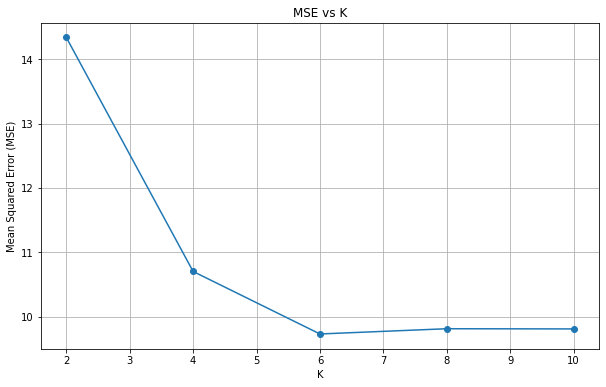

In [27]:
#To plot a graph to showing how MSE changes with different K values
plt.figure(figsize=(10, 6))
plt.plot(K_values, mse_values, marker='o')
plt.xlabel('K')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs K')
plt.grid(True)
plt.show()

In [28]:
results

{'Without PCA': {'MSE': 9.519707968942528,
  'MAE': 2.154763693387445,
  'R2': 0.9734757282698714},
 'With PCA, K=2': {'MSE': 14.33907963018879,
  'MAE': 2.78866983423226,
  'R2': 0.9600477613691623},
 'With PCA, K=4': {'MSE': 10.700931507198215,
  'MAE': 2.358743648296678,
  'R2': 0.970184545997796},
 'With PCA, K=6': {'MSE': 9.72950318141529,
  'MAE': 2.2175099723317633,
  'R2': 0.9728911866808372},
 'With PCA, K=8': {'MSE': 9.81100529240627,
  'MAE': 2.207835320526156,
  'R2': 0.9726641015490709},
 'With PCA, K=10': {'MSE': 9.808065876577828,
  'MAE': 2.2080664888333583,
  'R2': 0.9726722914919153}}

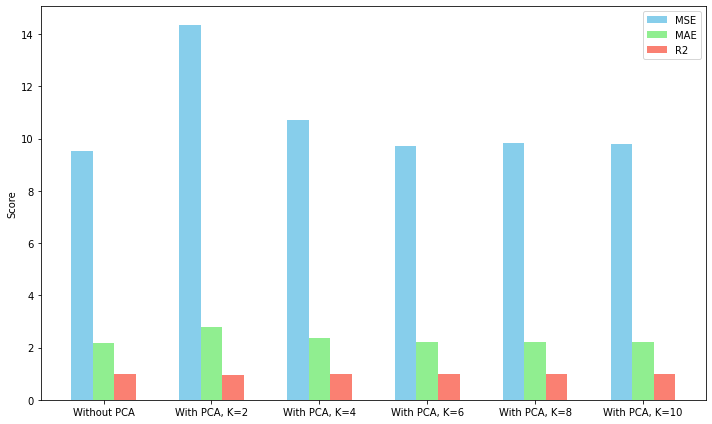

In [29]:
#To create bar chart comparing the metrics 
labels = list(results.keys())
mse_values = [results[label]['MSE'] for label in labels]
mae_values = [results[label]['MAE'] for label in labels]
r2_values = [results[label]['R2'] for label in labels]

x = np.arange(len(labels))
width = 0.2  

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, mse_values, width, label='MSE', color='skyblue')
rects2 = ax.bar(x, mae_values, width, label='MAE', color='lightgreen')
rects3 = ax.bar(x + width, r2_values, width, label='R2', color='salmon')

ax.set_ylabel('Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()